# **Setup**

In [1]:
#install kaggle
! pip install kaggle
! mkdir ~/.kaggle
#make sure too add kaggle.json!
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#pull dataset from site
! kaggle datasets download alessiocorrado99/animals10
#unzip all files
! unzip animals10.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
User cancelled operation
Archive:  animals10.zip
replace raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Imports**

In [1]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import cv2 #display images
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

## **Categorize the contents of folder**

In [2]:
#categorize contents of folder
animalImage = []
animalLabel = []
i = 0

#get the proper file path of animals
fileDirec = '/content/raw-img'
animalFiles = []


#storing files and labels separately
for folderName in os.listdir("raw-img"):
  directory = os.path.join(fileDirec,folderName)
  print(directory)
  for imagePath in os.listdir(directory):
    image = cv2.imread(os.path.join(directory, imagePath))
    resizedImage = cv2.resize(image,(224,224))
    animalImage.append(resizedImage)
    animalLabel.append(i)
  i = i+1

/content/raw-img/cane
/content/raw-img/gatto
/content/raw-img/mucca
/content/raw-img/elefante
/content/raw-img/cavallo
/content/raw-img/gallina
/content/raw-img/pecora
/content/raw-img/farfalla
/content/raw-img/scoiattolo
/content/raw-img/ragno


## **Split dataset to training and learning**

In [3]:
x = np.array(animalImage)
y = np.array(animalLabel)
#one hot encode
import sklearn.preprocessing
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(y)+1))
y = label_binarizer.transform(y)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

print(x_train.shape)
print(y_train.shape)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
(20943, 224, 224, 3)
(20943, 10)


# **Create VGG16 Model**

In [4]:
#make vgg16 model
cnn = tf.keras.models.Sequential() #initializing the CNN
#add layers
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding = "same", input_shape=[224, 224, 3])) #Input 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same"))  #convolution layers 1
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 2
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) #convolution layers 2
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")) #convolution layers 3
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 4
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")) #Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 5

cnn.add(tf.keras.layers.Flatten()) #Flattening
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))#Full Connection1
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units=64, activation="relu"))#Full Connection2
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units=32, activation="relu"))#Full Connection3
tf.keras.layers.Dropout(0.5)
cnn.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

# **Compile Model**

In [5]:
cnn.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
history = cnn.fit(x_train, y_train, batch_size = 100, epochs= 20, validation_data=(x_val, y_val))

Epoch 1/20
210/210 [==============================] - 69s 305ms/step - loss: 3.0689 - accuracy: 0.1827 - val_loss: 2.2309 - val_accuracy: 0.1790
Epoch 2/20
210/210 [==============================] - 62s 296ms/step - loss: 1.9635 - accuracy: 0.3115 - val_loss: 1.8343 - val_accuracy: 0.3694
Epoch 3/20
210/210 [==============================] - 62s 296ms/step - loss: 1.7973 - accuracy: 0.3815 - val_loss: 1.7833 - val_accuracy: 0.3850
Epoch 4/20
210/210 [==============================] - 62s 296ms/step - loss: 1.6094 - accuracy: 0.4443 - val_loss: 1.5792 - val_accuracy: 0.4658
Epoch 5/20
210/210 [==============================] - 62s 296ms/step - loss: 1.4321 - accuracy: 0.5156 - val_loss: 1.4243 - val_accuracy: 0.5271
Epoch 6/20
210/210 [==============================] - 62s 296ms/step - loss: 1.2959 - accuracy: 0.5545 - val_loss: 1.3266 - val_accuracy: 0.5625
Epoch 7/20
210/210 [==============================] - 62s 295ms/step - loss: 1.1827 - accuracy: 0.5935 - val_loss: 1.3071 - val_ac

## **Results**

In [13]:
score = cnn.evaluate(x_test, y_test)
print('Total loss on Testing Set:', score[0])
print('Accuracy of Testing Set:', score[1])

164/164 [==============================] - 5s 33ms/step - loss: 0.5330 - accuracy: 0.8831
Total loss on Testing Set: 0.5330036282539368
Accuracy of Testing Set: 0.8831169009208679


## **Make Predictions**

In [7]:
#predictions
x_new = x_test[:3]
y_proba = cnn.predict(x_new)
y_proba.round(2)
y_pred = np.argmax(cnn.predict(x_new), axis=-1)
y_pred #index of predictions

array([0, 7, 1])

## **Animal Class Names translated**

In [8]:
#class names
names = ["dog",
"cat",
"cow",
"elephant",
"horse",
"chicken",
"sheep",
"butterfly",
"squirrel",
"spider"]

In [9]:
#prediction of names
np.array(names)[y_pred]
y_new = y_test[:3]
y_new #returns onehot encoding of array

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

# **Predictions**

dog


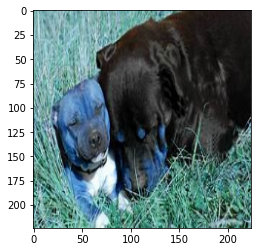

In [10]:
#prediction 1
plt.imshow(x_new[0]/255.) #displays the image
print(names[y_pred[0]])

butterfly


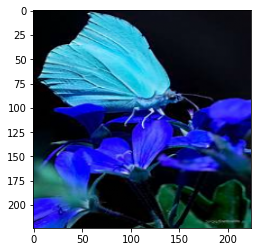

In [11]:
#prediction 2
plt.imshow(x_new[1]/255.) #displays the image
print(names[y_pred[1]])

cat


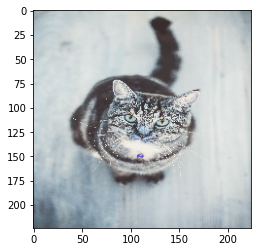

In [12]:
#prediction 3
plt.imshow(x_new[2]/255.) #displays the image
print(names[y_pred[2]])